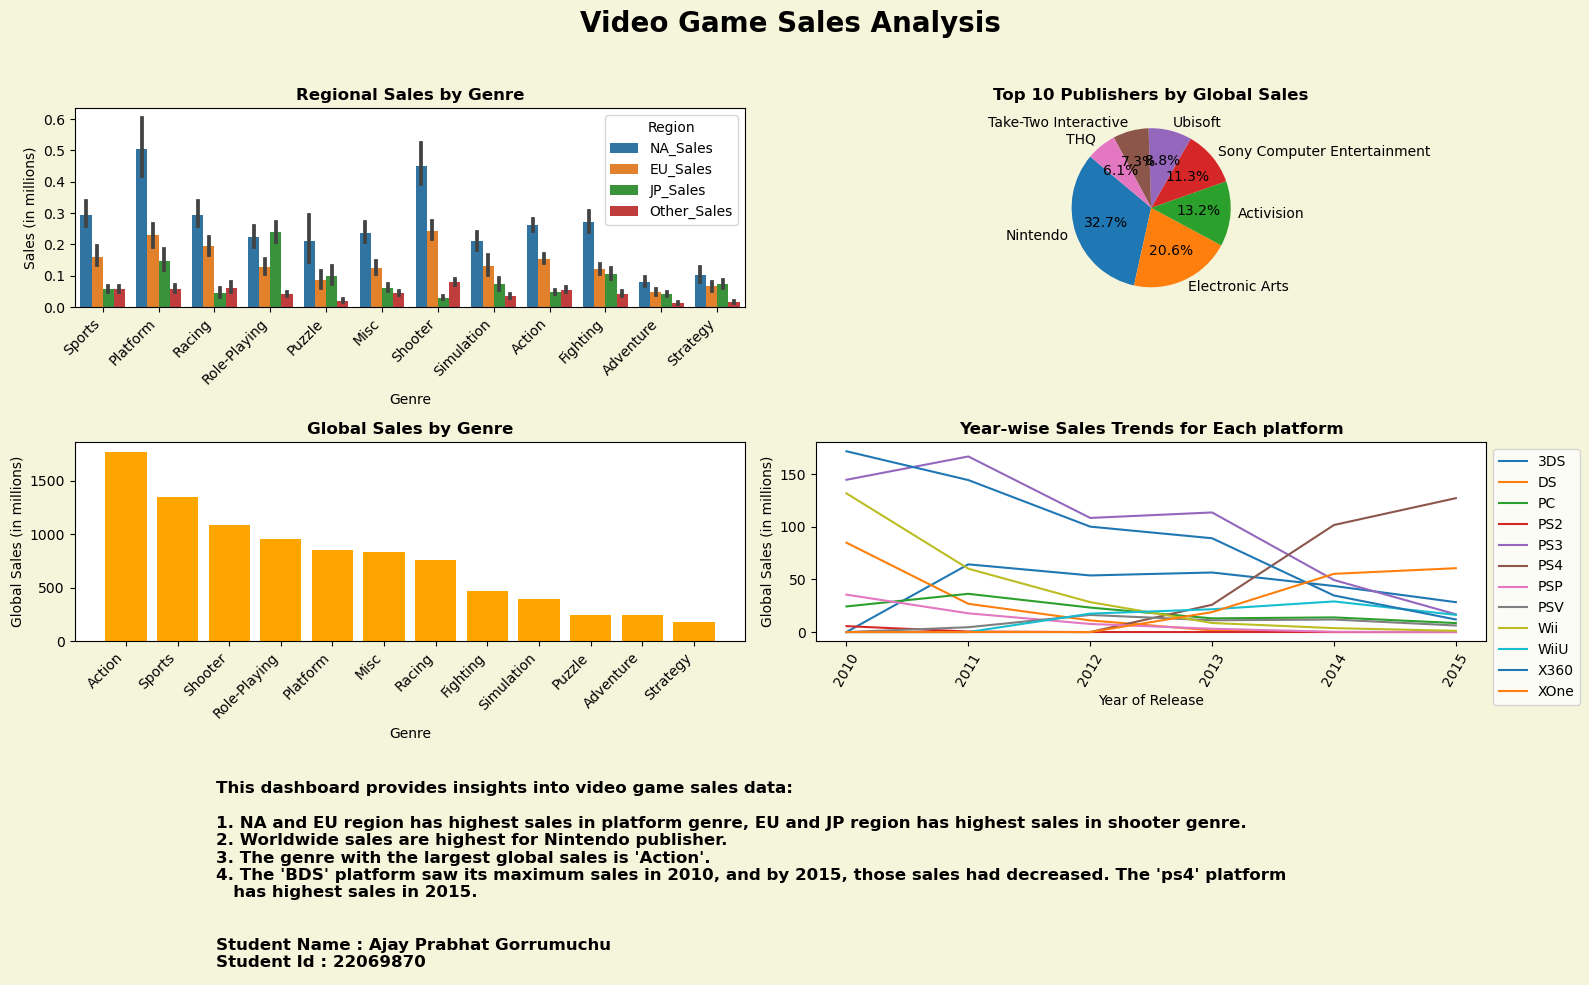

In [1]:
#DataSourceLink : https://www.kaggle.com/code/maso0dahmed/video-games-data-complete-eda/input
#Github Link : https://github.com/ajayprabhatGorrumuchu/video_Games.git

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Video_Games.csv')

# Melt the dataframe to combine sales columns
df_melted = pd.melt(data , id_vars = ['Genre'] ,
                    value_vars = ['NA_Sales' , 'EU_Sales' , 'JP_Sales' , 'Other_Sales'] ,
                    var_name = 'Region' , value_name = 'Sales')

# Create a figure with a specified background color
fig = plt.figure(figsize = (16 , 10) , facecolor = 'Beige')

# Subplot 1: Regional Sales by Genre
plt.subplot(3 , 2 , 1)
sns.barplot(x = 'Genre' , y = 'Sales' , hue = 'Region' , data = df_melted)
plt.title('Regional Sales by Genre' , fontweight = 'bold')
plt.xticks(rotation = 45 , ha = 'right')  # Rotate x-axis labels for better readability
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')

# Subplot 2: Top 10 Publishers by Global Sales (Pie Chart)
plt.subplot(3 , 2 , 2)
publisher_sales = data.groupby('Publisher')['Global_Sales'].sum().reset_index()
publisher_sales = publisher_sales.sort_values(by = 'Global_Sales' , ascending = False)
top_10_publishers = publisher_sales.head(7)
plt.pie(top_10_publishers['Global_Sales'] , labels = top_10_publishers['Publisher'] ,
        autopct = '%1.1f%%' , startangle = 140)
plt.title('Top 10 Publishers by Global Sales' , fontweight = 'bold')

# Subplot 3: Global Sales by Genre (Bar Plot)
plt.subplot(3 , 2 , 3)
genre_sales = data.groupby('Genre')['Global_Sales'].sum().reset_index()
genre_sales = genre_sales.sort_values(by = 'Global_Sales' , ascending = False)
plt.bar(genre_sales['Genre'] , genre_sales['Global_Sales'] , color = 'orange')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales by Genre' , fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right')  # Rotate x-axis labels for better readability

# Subplot 4: Year-wise Sales Trends for Each Genre (Line Graph)
plt.subplot(3 , 2 , 4)
filterData = data[(data['Year_of_Release'] >= 2010) & (data['Year_of_Release'] <= 2015)]
year_genre_sales = filterData.groupby(['Year_of_Release' , 'Platform'])['Global_Sales']\
    .sum().reset_index()
pivot_df = year_genre_sales.pivot(index = 'Year_of_Release', columns = 'Platform' ,
                                  values = 'Global_Sales').fillna(0)
for genre in pivot_df.columns:
    plt.plot(pivot_df.index , pivot_df[genre] , label = genre)
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (in millions)')
plt.title('Year-wise Sales Trends for Each platform' , fontweight = 'bold')
plt.xticks(rotation = 60)  # Rotate x-axis ticks to 60 degrees
plt.legend(loc = 'upper left' , bbox_to_anchor = (1 , 1))

# Subplot 5: Text Description Grid
plt.subplot(3 , 2 , (5 , 6) , facecolor = '#f5f5f5')  # Specify background color
description_text = (
    "This dashboard provides insights into video game sales data:\n\n"
    "1. NA and EU region has highest sales in platform genre, EU and JP region has highest sales in shooter genre.\n"
    "2. Worldwide sales are highest for Nintendo publisher.\n"
    "3. The genre with the largest global sales is 'Action'.\n"
    "4. The 'BDS' platform saw its maximum sales in 2010, and by 2015, those sales had decreased. The 'ps4' platform\n"
    "   has highest sales in 2015.\n"
    "\n"
    "\n"
    "Student Name : Ajay Prabhat Gorrumuchu\n"
    "Student Id : 22069870"
)

plt.text(0.1 , 0.5 , description_text , ha = 'left' , va = 'center' ,
         fontsize = 12 , color = 'black' , fontweight = 'bold')
plt.axis('off')  # Turn off axis for pure text description

# Add a title for the entire dashboard
fig.suptitle("Video Game Sales Analysis " , fontsize = 20 , color = 'black' ,
             fontweight = 'bold')

# Adjust layout
plt.tight_layout(rect = [0 , 0 , 1 , 0.96])
plt.savefig('22069870.png' , dpi=300)
# Show the dashboard
plt.show()
